<a href="https://www.kaggle.com/code/vincentokumu/dry-eye-disease-modeling?scriptVersionId=224676357" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")


<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h1>Data Import</h1>
    <p></p>
</div>

In [2]:
#Importing data
data = pd.read_csv(r"/kaggle/input/dry-eye-disease/Dry_Eye_Dataset.csv") #reads in data

# Split 'Blood pressure' into 'Systolic BP' and 'Diastolic BP'
data[['Systolic BP', 'Diastolic BP']] = data['Blood pressure'].str.split('/', expand=True).astype(float)

# Drop the original 'Blood pressure' column
data.drop(columns=['Blood pressure'], inplace=True)

data.head() #calls glimpse of data frame


,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,...,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP
0,F,24,9.5,2,1,67,3000,31,161,69,...,Y,N,8.7,N,Y,Y,N,Y,137.0,89.0
1,M,39,9.6,2,3,60,12000,74,164,87,...,Y,N,9.6,Y,N,N,Y,Y,108.0,64.0
2,F,45,5.4,1,5,95,12000,93,179,94,...,N,Y,4.0,N,Y,N,N,N,134.0,81.0
3,F,45,5.4,4,5,78,19000,32,160,77,...,N,N,7.6,N,Y,N,Y,N,110.0,90.0
4,F,42,5.7,3,2,72,4000,173,179,99,...,N,N,3.5,N,Y,Y,N,Y,99.0,67.0


<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h1>Checking for Normality</h1>
    <p> With the following code we check for normality in the numerical columns of a dataset (data). Normality testing is crucial in statistical analysis to determine whether data follows a normal distribution, which impacts the choice of statistical tests and modeling approaches.</p>
</div>  




In [3]:
#Importing required libraries
import scipy.stats as stats
from scipy.stats import shapiro, normaltest, anderson # Imports necessary statistical tests from scipy.stats

numerical_cols = data.select_dtypes(include=[np.number]).columns # Extracts columns that contain numeric data from the data frame.

results = [] # Initializes a DataFrame to store results

for col in numerical_cols: # Initiates iteration through each numerical column in the data frame.
    try:
        sample_size = len(data[col].dropna()) # Drops missing values (NaN) from each column before calculating the sample size

        if sample_size <= 5000:
            
            stat, p = shapiro(data[col].dropna()) # Prompts for the use of the Shapiro-Wilk test if the sample size is <= 5000, 
            test_name = "Shapiro-Wilk" # Shapiro-Wilk test is effective for small samples.
        else:
            
            
            stat, p = normaltest(data[col].dropna()) # For a sample size > 5000, it prompts the use of D’Agostino and Pearson’s test, 
            test_name = "D'Agostino-Pearson" # D’Agostino and Pearson’s test is better suited for large datasets.

        
        results.append([col, test_name, f"{stat:.4f}", f"{p:.4f}"]) # Stores results in a list
        
    except Exception as e:
        print(f"Error processing {col}: {e}") # Catches and prints any errors that may occur during processing.

# Converting the results list into a Pandas DataFrame with appropriate column names.
results_df = pd.DataFrame(results, 
                          columns=["Variable", "Test", 
                                   "Statistic", "p-value"]) 

# Pivot table for better display

pivot_table = results_df.pivot(index="Variable", 
                               columns="Test", 
                               values=["Statistic", "p-value"]) #Creates a pivot table where: Each row represents a 
                                                                #variable and Columns are split based on the test used.
                                                                #shows Statistic and p-value.
# Fix column formatting
pivot_table.columns = [f"{stat} - {test}" for stat, 
                       test in pivot_table.columns] #Renames columns to clearly indicate which values belong to which test.

print(pivot_table) #Displays the results in a formatted table.
 

                    Statistic - D'Agostino-Pearson  \
Variable                                             
Age                                     17964.8260   
Average screen time                     18144.4625   
Daily steps                             17409.6397   
Diastolic BP                            19150.6874   
Heart rate                              16940.7475   
Height                                  19561.5822   
Physical activity                       17039.0086   
Sleep duration                          16866.9405   
Sleep quality                           68041.1982   
Stress level                            52381.5147   
Systolic BP                             17865.7452   
Weight                                  19114.6235   

                    p-value - D'Agostino-Pearson  
Variable                                          
Age                                       0.0000  
Average screen time                       0.0000  
Daily steps                            

In [4]:
# Convert DED variable from string to numeric, 

# Transforming the values in the 'Dry Eye Disease' column 
data['Dry Eye Disease'] = data['Dry Eye Disease'].map({'Y': 1, 'N': 0}) # The map() function transforms values in the 'Dry Eye Disease' column.
                                                                        # converts 'Y' to 1 and 'N' to 0

# View distribution
print(data['Dry Eye Disease'].value_counts())
print(data['Dry Eye Disease'].value_counts(normalize=True) * 100) # Makes value_counts() to return relative frequencies instead of absolute counts.
                                                                  # Multiplying by 100 converts the frequencies to percentages.


Dry Eye Disease
1    13037
0     6963
Name: count, dtype: int64
Dry Eye Disease
1    65.185
0    34.815
Name: proportion, dtype: float64


<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h1>Visualizing the Distributions</h1>
    <p>This helps inspect the data visualy to ensure the right method is chosen to run the model.</p>
</div> 



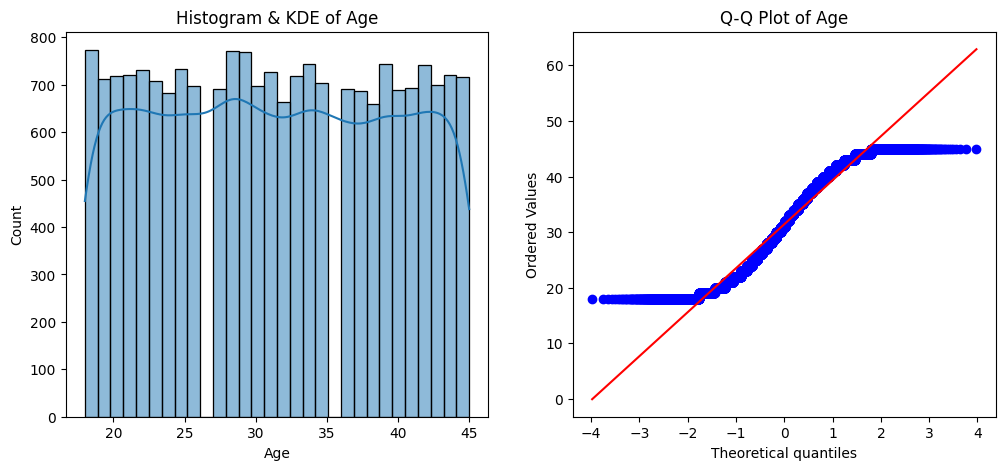

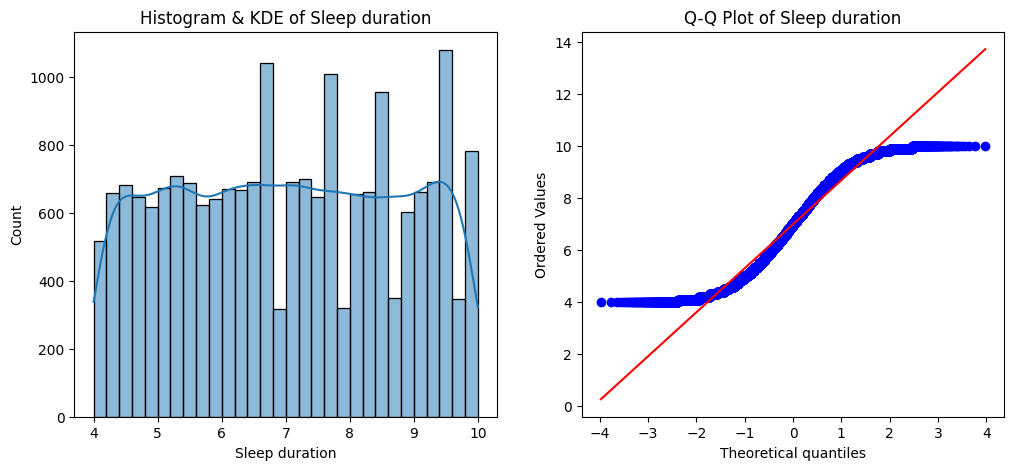

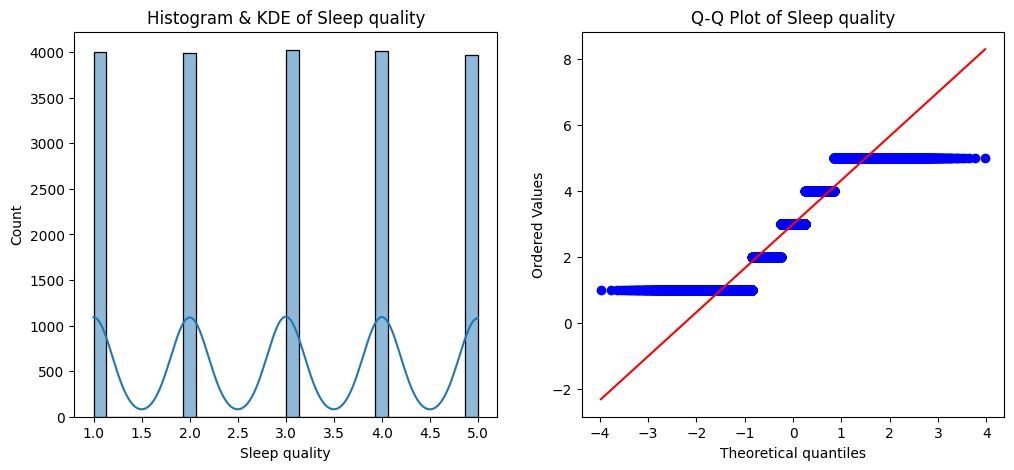

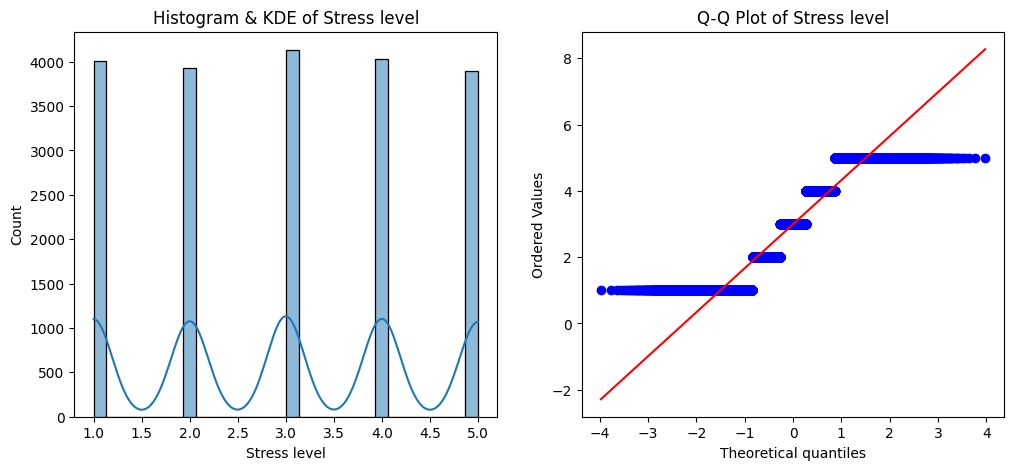

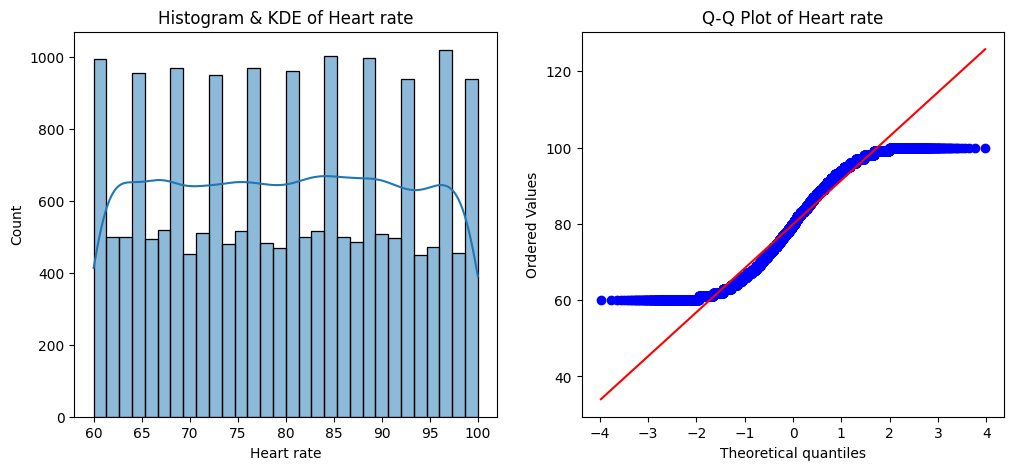

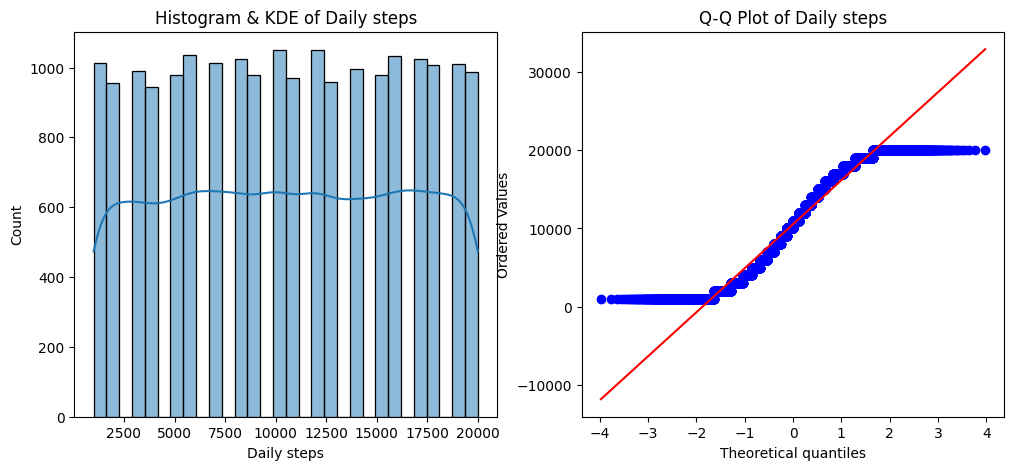

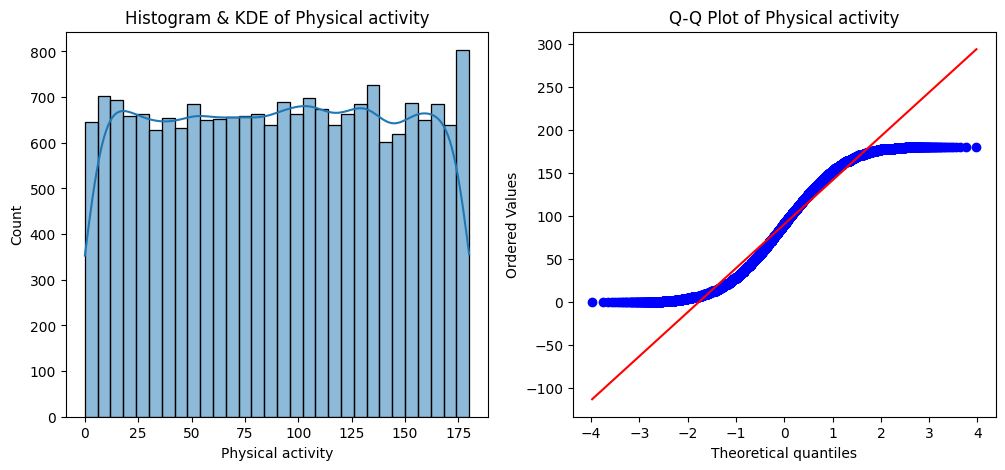

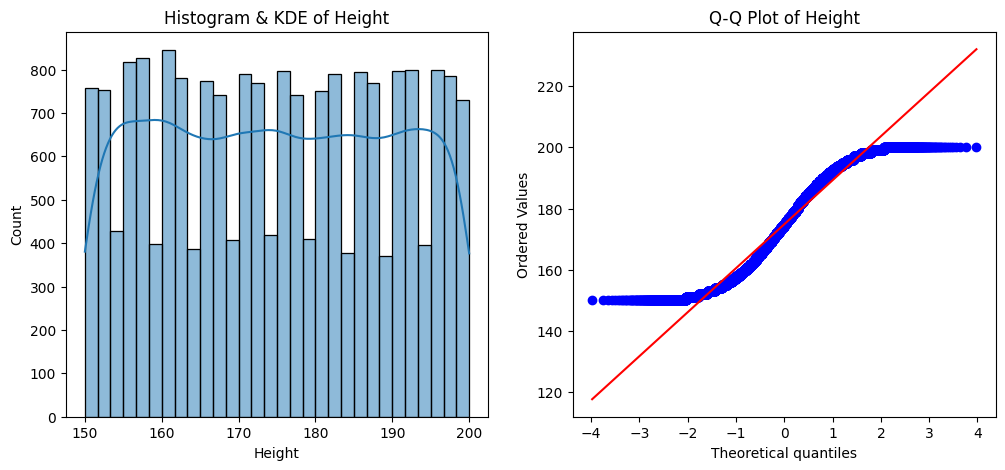

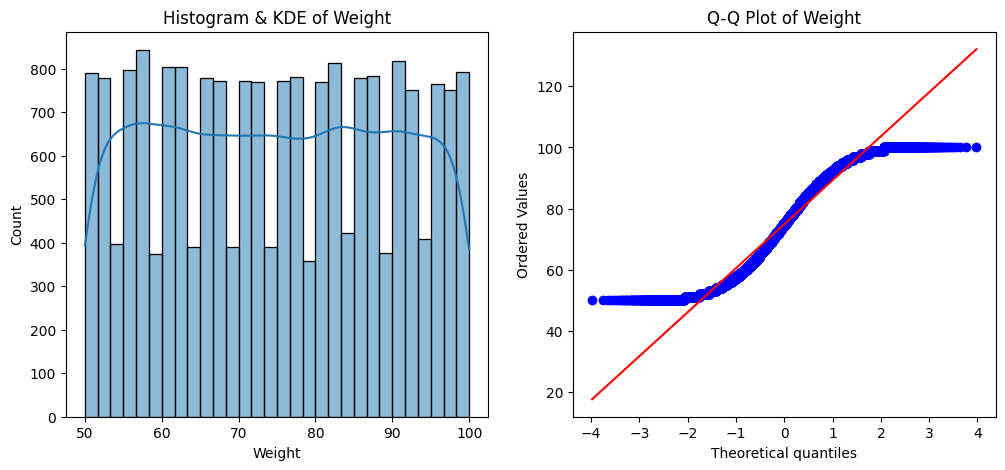

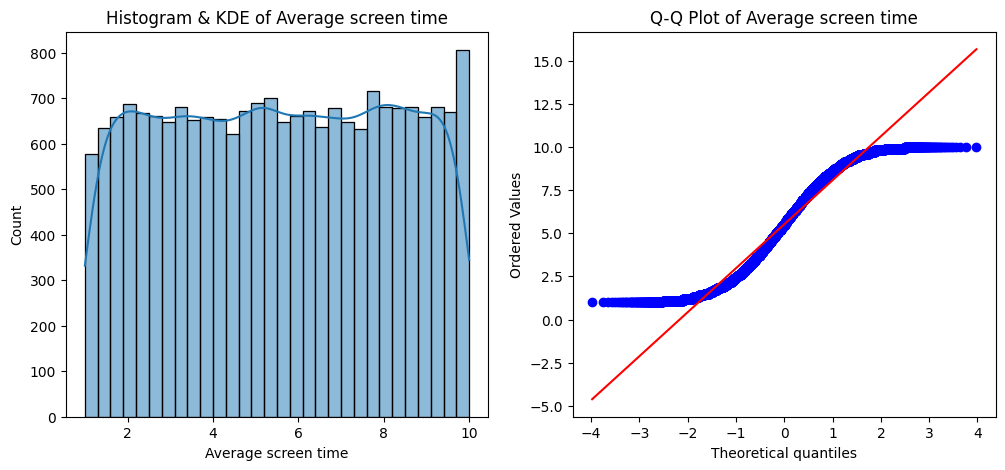

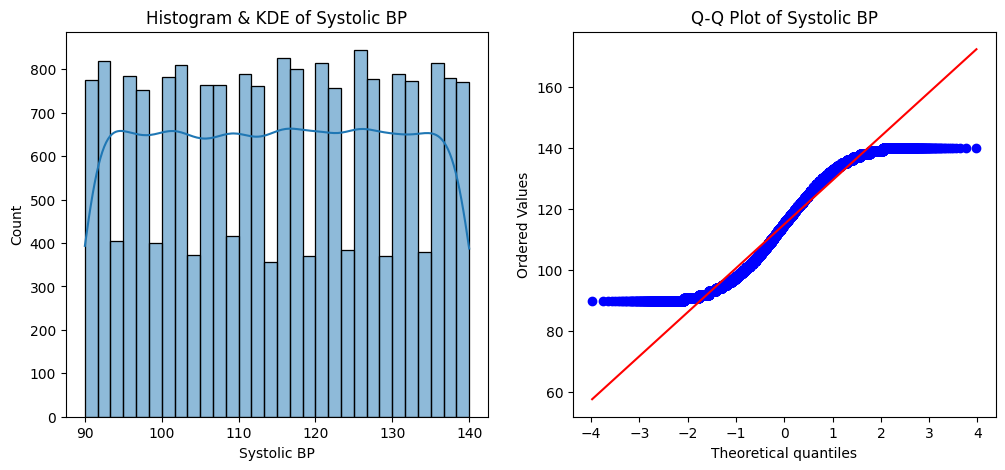

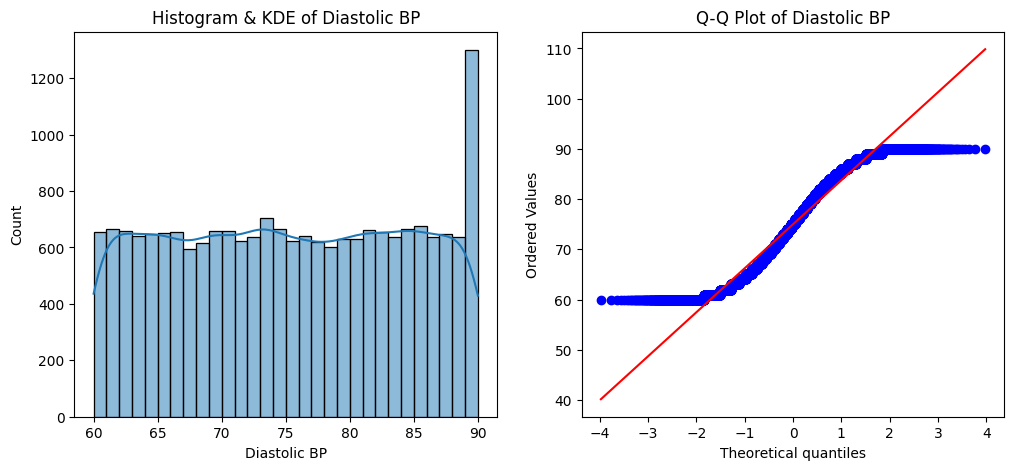

In [5]:
#Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols: #The loop iterates over each column in numerical_cols, assumed to be a list of numerical column names from the dataset.
    plt.figure(figsize=(12,5)) #Creates a new figure with a size of 12x5 inches 
                               #accommodates two subplots: a histogram with a KDE plot and a Q-Q plot.

    #Histogram and KDE
    plt.subplot(1,2,1) #Creates a subplot (1 row, 2 columns, selecting the first plot).
    sns.histplot(data[col].dropna(),kde=True, bins=30) #Plots a histogram for the column col, with:
                                                       #dropna(): Ensures missing values are removed.
                                                       #kde=True: Adds a Kernel Density Estimate (KDE) curve, which smooths the distribution.
                                                       #bins=30: Sets the number of bins for the histogram.
    plt.title(f"Histogram & KDE of {col}") #Sets the title to indicate which column is being visualized.

    # Q-Q Plot
    plt.subplot(1,2,2) #Creates the second subplot in the same figure.
    stats.probplot(data[col].dropna(), dist="norm", plot=plt) #Generates a Q-Q (Quantile-Quantile) plot, used to assess if a dataset follows a normal distribution.
                                                              #dist="norm": Compares the data against a normal distribution.
                                                              #plot=plt: Uses Matplotlib to display the plot.
    plt.title(f"Q-Q Plot of {col}") #Sets the title for the Q-Q plot.
    
    plt.show()
    

<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h1>Choosing between Decision Tree Model and Random Forest</h1>
    <p></p>
</div> 



In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Define independent variables (X) and dependent variable (y)
x = data.drop(columns=["Dry Eye Disease"])  
y = data["Dry Eye Disease"]

# Encoding categorical variables
x = pd.get_dummies(x, drop_first=True)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Standardize numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_dt_pred = dt_model.predict(x_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_rf_pred = rf_model.predict(x_test)

In [8]:
# Compute Accuracies
dt_acc = accuracy_score(y_test, y_dt_pred)
rf_acc = accuracy_score(y_test, y_rf_pred)

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Decision Tree Accuracy: 0.5687
Random Forest Accuracy: 0.6997


<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h3>Accuracy Comparison</h3>
    <p>Decision Tree Accuracy: 0.5687 (56.87%)</p> 
    <p>Random Forest Accuracy: 0.6997 (69.97%).</p> 
    <p>It implies that Random Forest significantly outperforms Decision Tree in accuracy as it generalizes better and reduces overfitting.</p>
</div>


In [9]:
# Classification Reports
print("\nDecision Tree Report:")
print(classification_report(y_test, y_dt_pred))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_rf_pred))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.39      0.42      0.40      1393
           1       0.68      0.65      0.66      2607

    accuracy                           0.57      4000
   macro avg       0.53      0.53      0.53      4000
weighted avg       0.58      0.57      0.57      4000


Random Forest Report:
              precision    recall  f1-score   support

           0       0.69      0.25      0.37      1393
           1       0.70      0.94      0.80      2607

    accuracy                           0.70      4000
   macro avg       0.70      0.59      0.58      4000
weighted avg       0.70      0.70      0.65      4000



<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h3>Precision, Recall, and F1-score Analysis</h3>
    <p>For Class 0 (No DED): Decision Tree precision is 0.39, with a recall of 0.42, and F1-score of 0.40.</p>
    <p>Random Forest has a precision of 0.69, with a recall of 0.25, and F1-score of 0.37.</p>
    <p>Random Forest has better precision but much lower recall—it correctly identifies more "No DED" cases but misses many.</p>
    <p>For Class 1 (DED):  Decision Tree has a precision of 0.68, with a recall of 0.65, and F1-score of 0.66.</p>   
    <p>Random Forest has a precision of 0.70, with a recall of 0.94, and F1-score of 0.80.</p>    
    <p>Random Forest is much better at detecting DED cases, with higher recall (0.94) meaning fewer false negatives.</p>    
</div>




In [10]:
# Cross-Validation Comparison
dt_cv_score = np.mean(cross_val_score(dt_model, x_train, y_train, cv=5))
rf_cv_score = np.mean(cross_val_score(rf_model, x_train, y_train, cv=5))

print(f"\nDecision Tree CV Score: {dt_cv_score:.4f}")
print(f"Random Forest CV Score: {rf_cv_score:.4f}")


Decision Tree CV Score: 0.5661
Random Forest CV Score: 0.6929


<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h3>Cross-Validation Scores</h3>
    <p>Decision Tree CV Score: 0.5661 (similar to accuracy, meaning stable performance).</p> 
    <p>Random Forest CV Score: 0.6929 (consistent with its accuracy, meaning it generalizes well).</p>
    <p>Random Forest maintains stability across different training splits.</p> 
</div>




In [11]:
# Compare ROC-AUC Scores
print("\nDecision Tree ROC-AUC:", roc_auc_score(y_test, dt_model.predict_proba(x_test)[:, 1]))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1]))


Decision Tree ROC-AUC: 0.5332700821219363
Random Forest ROC-AUC: 0.5936193653896089


<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h3>ROC-AUC Score (Discrimination Ability)</h3>
    <p>Decision Tree ROC-AUC: 0.5333 (Barely better than random guessing at 0.50). Random Forest ROC-AUC: 0.5936 (Better, but still not great).</p>   
    <p>Random Forest has slightly better discriminatory power than Decision Tree but still struggles with clear separation between DED and No DED cases.</p>
    <h4>Conclusions & Next Steps:</h4>
    <p>Random Forest performs better overall, especially in predicting DED (class 1) cases with high recall. But it struggles to correctly classify "No DED" (class 0), likely due to class imbalance.</p>
</div>




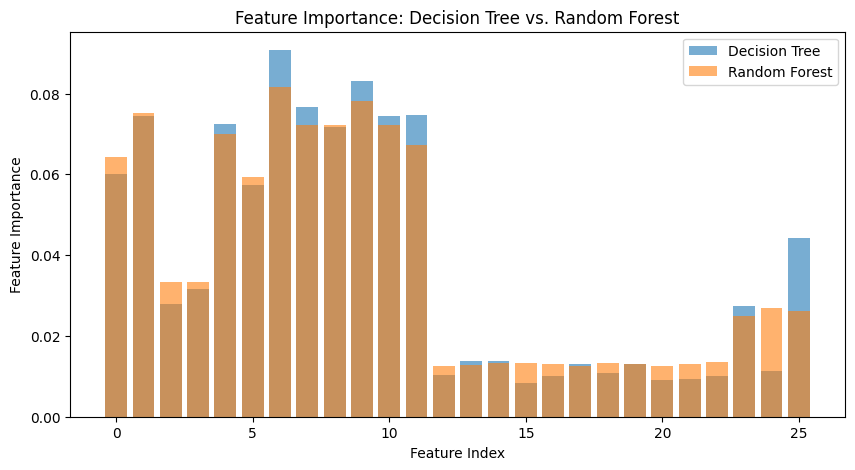

In [12]:
# Feature Importance Comparison
plt.figure(figsize=(10, 5))
plt.bar(range(x.shape[1]), dt_model.feature_importances_, alpha=0.6, label="Decision Tree")
plt.bar(range(x.shape[1]), rf_model.feature_importances_, alpha=0.6, label="Random Forest")
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.legend()
plt.title("Feature Importance: Decision Tree vs. Random Forest")
plt.show()


<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h3>Key Takeaway:</h3>
    <p>Decision Tree has more balanced recall between classes but lower accuracy overall.</p> 
    <p>Random Forest strongly favors predicting incidence (high recall = 0.94), but struggles with No incidence (low recall = 0.25).</p> 
    <p>This suggests an imbalance issue—Random Forest may be biased toward classifying cases as DED (1).</p>
</div>



<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h1>Random Forest</h1>
    <p>After testing the attributes of Decision Tree and Random Forest, we settle on the latter. Here we test the model's ability to predict incidence of Dry Eye Disease. We now perform feature importance analysis (either classification or regression) based on Gini impurity (for classification) or variance reduction (for regression). The code below evaluates which features contribute the most to predicting Dry Eye Disease (DED).</p>
</div>
 

 

In [13]:
#Random Forest - Feature importance based on Gini/Permutation

#Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor #RandomForestClassifier and RandomForestRegressor are used to 
                                                                           #build either a classification or regression model.

from sklearn.preprocessing import LabelEncoder #LabelEncoder helps encode categorical variables into numerical values.

#Assuming 'x' is the feature matrix, and 'y' is the target variable (DED)
x = data.drop(columns=["Dry Eye Disease"])  #x being the feature matrix, contains all independent variables to predict "Dry Eye Disease".
y = data["Dry Eye Disease"] #y is the dependent variable, which we aim to predict ("Dry Eye Disease")

#Encoding categorical variables
label_encoders = {}
for col in x.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col]) #Identifies categorical columns in x, then encodes them into numerical values using LabelEncoder().
    label_encoders[col] = le  # Stores encoders in case you need to reverse the transformation later

In [14]:
# Choose model type
if y.nunique() > 2:  # If y has more than two unique values, it is treated as a regression problem (continuous target).
    model = RandomForestRegressor(n_estimators=100, random_state=42)

else:  # If y has two unique values, it is a classification problem (binary target).
    model = RandomForestClassifier(n_estimators=100, random_state=42) # Creates a Random Forest model with 100 trees (n_estimators=100) for either case.

# Train model
model.fit(x, y) #The Random Forest model is trained on X (features) and y (target variable).

# Get feature importance
feature_importances = pd.DataFrame({"Feature": x.columns, "Importance": model.feature_importances_}) #model.feature_importances_ retrieves the importance of 
                                   #each feature in predicting y, based on Gini impurity (for classification) or variance reduction (for regression).

feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Selected features
from sklearn.feature_selection import RFE

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf_model, n_features_to_select=15)  # Adjust the number of features as needed
rfe.fit(x, y)

selected_features = x.columns[rfe.support_]

# Display top features
print(feature_importances.head(15))  # Show top 15 most important features affecting the prediction of Dry Eye Disease.

                        Feature  Importance
7             Physical activity    0.081281
19          Average screen time    0.078324
2                Sleep duration    0.074721
24                  Systolic BP    0.071780
8                        Height    0.071643
9                        Weight    0.071473
5                    Heart rate    0.069016
25                 Diastolic BP    0.066226
1                           Age    0.065255
6                   Daily steps    0.060640
3                 Sleep quality    0.033683
4                  Stress level    0.032890
21        Discomfort Eye-strain    0.028160
23  Itchiness/Irritation in eye    0.027276
22               Redness in eye    0.025031


<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h1>Model Training</h1>
</div>


In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h1>Model Evaluation</h1>
</div>
 

In [16]:
# Predictions using Random Forest model
y_pred = rf_model.predict(x_test)
y_prob = rf_model.predict_proba(x_test)[:, 1]  # Probability for the positive class

y_pred = rf_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.69975
              precision    recall  f1-score   support

           0       0.69      0.25      0.37      1393
           1       0.70      0.94      0.80      2607

    accuracy                           0.70      4000
   macro avg       0.70      0.59      0.58      4000
weighted avg       0.70      0.70      0.65      4000



<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h3>Overall Model Performance</h3>
    <p>Accuracy = 0.69975 (~70%), meaning the model correctly classifies approximately 70% of all cases.</p>
    <p>However, accuracy alone can be misleading if the classes are imbalanced (i.e., more instances of 1 than 0).</p>  

<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">        
    <h3>Class-wise Performance</h3>
    <p>The training dataset has two classes: Class 0 (No Dry Eye Disease) with 1,393 samples, and Class 1 (Dry Eye Disease) with 2,607 samples.</p>
    <p>In terms of precision, 69% of predicted No Dry Eye Disease cases are classified as No Dry Eye Disease, and a further 70% of predicted Dry Eye Disease cases as Dry Eye Disease.</p>
    <p>In terms of recall, the model finds 94% of actual Dry Eye Disease cases but only 25% of actual No Dry Eye Disease cases.</p>
    <p>With an f1 score of 0.80 for Dry Eye Disease cases, the model can be considered good as it balances precision and recall.</p>
    <p>However, with an f1 score of only 0.37 for No Dry Eye Disease, the model is not as good because of poor recall.</p>
</div>
 


In [17]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.25      0.37      1393
           1       0.70      0.94      0.80      2607

    accuracy                           0.70      4000
   macro avg       0.70      0.59      0.58      4000
weighted avg       0.70      0.70      0.65      4000



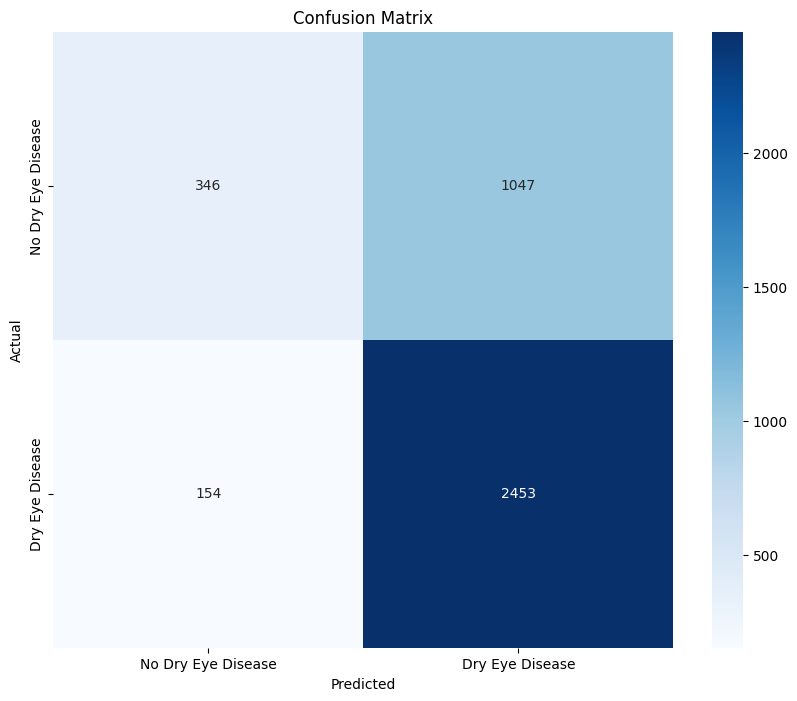

In [18]:
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Dry Eye Disease", "Dry Eye Disease"], 
            yticklabels=["No Dry Eye Disease", "Dry Eye Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

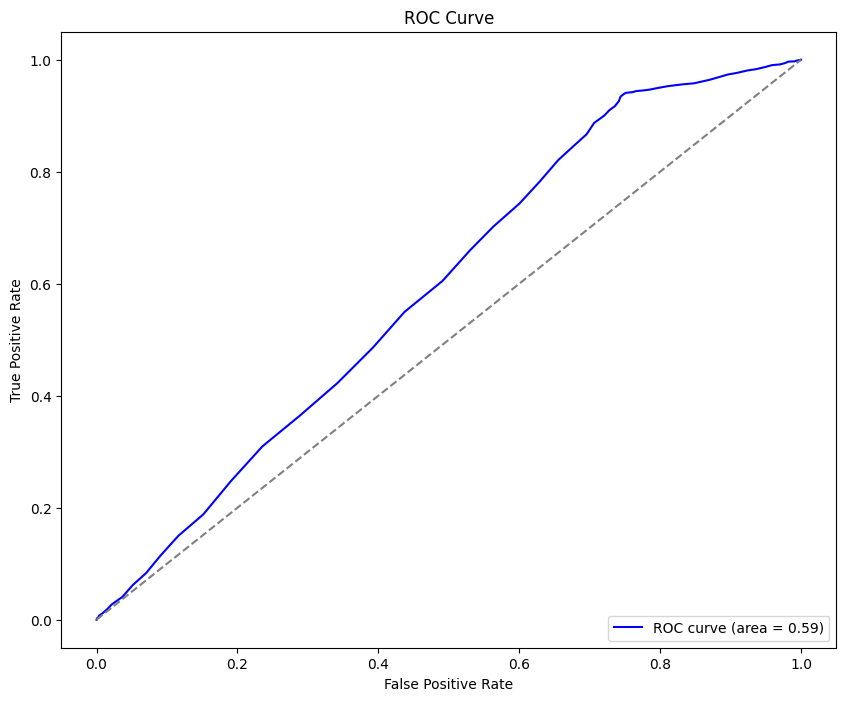

In [19]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [20]:
# Model Training
x_selected = x[selected_features]  # Use selected features
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.22      0.33      1307
           1       0.71      0.93      0.81      2693

    accuracy                           0.70      4000
   macro avg       0.66      0.58      0.57      4000
weighted avg       0.68      0.70      0.65      4000



<div style="background-color: #FFCCBC; color: #5D4037; padding: 10px; border-radius: 5px;">
    <h1>Prediction of Dry Eye Disease Incidence</h1>
    <p>After testing the model, we now create a sample data frame with variables included in the selected features to check how well the model predicts a patient's likelyhood of presenting with Dry Eye Disease, given their attributes.</p>
</div>

In [21]:

new_patient_data = pd.DataFrame({
    'Physical activity': [190, 201, 120, 60],
    'Average screen time': [1, 10, 8, 9],
    'Sleep duration': [8, 6, 7, 4],
    'Systolic BP': [181, 170, 131, 140],
    'Height': [162, 150, 131, 160],
    'Weight': [91, 60, 51, 80],
    'Heart rate': [51, 70, 61, 80],
    'Diastolic BP': [51, 40, 41, 40],
    'Age': [32, 40, 25, 50],
    'Daily steps': [1000, 1200, 1500, 800],
    'Sleep quality': [1, 2, 2, 2],
    'Stress level': [1, 3, 4, 2],
    'Discomfort Eye-strain': [1, 0, 0, 1],
    'Itchiness/Irritation in eye': [0, 0, 1, 0],
    'Redness in eye': [1, 1, 0, 1]
})
# Ensure it has the same feature columns as in training
new_patient_data = new_patient_data[selected_features]

# Predict
ded_prediction = rf_model.predict(new_patient_data)
ded_probability = rf_model.predict_proba(new_patient_data)[:, 1]

# Add predictions to DataFrame
new_patient_data['DED_Prediction'] = ded_prediction
new_patient_data['DED_Probability'] = ded_probability

print(new_patient_data)

   Age  Sleep duration  Sleep quality  Stress level  Heart rate  Daily steps  \
0   32               8              1             1          51         1000   
1   40               6              2             3          70         1200   
2   25               7              2             4          61         1500   
3   50               4              2             2          80          800   

   Physical activity  Height  Weight  Average screen time  \
0                190     162      91                    1   
1                201     150      60                   10   
2                120     131      51                    8   
3                 60     160      80                    9   

   Discomfort Eye-strain  Redness in eye  Itchiness/Irritation in eye  \
0                      1               1                            0   
1                      0               1                            0   
2                      0               0                            1   
3